
# <center>Classification</center>

<center>Anshuman Guha</center>  

<a id="top"></a>
## Assignment research question
Having discovered in the mini-lab exercise that the 2014 school data failed to provide a good generalization model supporting anecdotal claims that schools with a higher diversity of students, i.e., a mix of white, Black, Hispanic, Native American, Asian, tend to have higher attrition rates than schools who are less diverse, We will use data at a district level and include other features and improve our classificaton model. The purpose of this project is as follows:
1. classify if school has below average student teacher ratio or not given a set of socioeconomic data at a district level such as poverity rate, population size and household income
2. Regress the perecentage of reduced free luch kids given using all features at the district level
 

** Classification ** <br /><em>(Click hyperlinks to skip to answers)</em>
<p>** Data Preparation ** <a href="#dataPreparation">(15 points)</a></p>

* <a href="#defineAndPrepare">[10 points]</a> <em>Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.</em>
* <a href="#describeTheFinal">[5 points]</a> <em>Describe the final dataset that is used for classification/regression (include a
description of any newly formed variables you created).</em>

<p>** Modeling and Evaluation ** <a href="#modelingAndEvaluation">(70 points)</a></p>

* <a href="#chooseAndExplain">[10 points]</a> <em>Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.</em>
* <a href="#chooseTheMethod">[10 points]</a> <em>Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.</em>
* <a href="#createThreeDifferent">[20 points]</a> <em>Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!</em>
* <a href="#analyzeTheResults">[10 points]</a> <em>Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.</em>
* <a href="#discussTheAdvantages">[10 points]</a> <em>Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation.</em>
* <a href="#whichAttributesFrom">[10 points]</a> <em>Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.</em>

<p>** Deployment ** <a href="#deployment">(5 points)</a></p>
* <em>How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?</em>

<p>** Exceptional Work ** <a href="#exceptional">(10 points)</a></p>
* <em>You have free reign to provide additional analyses.</em>
* <em>One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?</em>

### Import relevant libraries

In [1]:
import os,sys
import xlrd
import math
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn import decomposition
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn import metrics as mt
from sklearn import svm

### Create list of files provided by OEQA

In [2]:
directoryPath = 'oeqaProfiles'
directory = os.listdir(directoryPath)
oeqaFilesProvided = []
for file in directory:
        oeqaFilesProvided.append(file)
print ('Number of files: '+ str(len(oeqaFilesProvided)))
print (oeqaFilesProvided)

Number of files: 18
['Profiles Database 1997(Excel 5).xls', 'Profiles Database 1998.xls', 'Profiles Database 1999.xls', 'Profiles Database 2000.xls', 'Profiles Database 2001.xls', 'Profiles Database 2002.xls', 'Profiles Database 2003.xls', 'Profiles Database 2004.xls', 'Profiles Database 2005.xls', 'Profiles Database 2006.xls', 'Profiles Database 2007.xls', 'Profiles Database 2008.xls', 'Profiles Database 2009.xls', 'Profiles Database 2010.xls', 'Profiles Database 2011.xlsx', 'Profiles Database 2012.xlsx', 'Profiles Database 2013.xlsx', 'Profiles Database 2014.xlsx']


### Create list of years of data

In [3]:
profileYears = []
yearsStart = int(1997)

while yearsStart < 2015:
    profileYears.append(yearsStart)
    yearsStart = yearsStart+1
print (profileYears)

[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]


### Import files to dictionary of dataframes

In [4]:
def importExcelFiles(dictionary,years,files,directory,sheetKeyword):
    count = 0
    for year in years:
        yearData = str(year)
        fileName = files[count]
        dataFrameName = sheetKeyword+yearData
        pathToFile = os.path.join(directory,fileName)
        sheetNames = pd.ExcelFile(pathToFile).sheet_names
        for sheetName in sheetNames:
            if sheetKeyword in sheetName:
                #Use print to provide user feedback
                print (fileName+" is now '"+dataFrameName+"'")
                try: 
                    dictionary[dataFrameName]=pd.read_excel(pathToFile,sheetname=sheetName,header=None)
                    ## Having an error with 2005
                except:
                    pass
        count = count+1
        
dataFrames = {}
importExcelFiles(dataFrames,profileYears,oeqaFilesProvided,"oeqaProfiles","School")

Profiles Database 1997(Excel 5).xls is now 'School1997'
Profiles Database 1998.xls is now 'School1998'
Profiles Database 1999.xls is now 'School1999'
Profiles Database 2000.xls is now 'School2000'
Profiles Database 2001.xls is now 'School2001'
Profiles Database 2002.xls is now 'School2002'
Profiles Database 2003.xls is now 'School2003'
Profiles Database 2004.xls is now 'School2004'
Profiles Database 2005.xls is now 'School2005'
Profiles Database 2006.xls is now 'School2006'
Profiles Database 2007.xls is now 'School2007'
Profiles Database 2008.xls is now 'School2008'
Profiles Database 2009.xls is now 'School2009'
Profiles Database 2010.xls is now 'School2010'
Profiles Database 2011.xlsx is now 'School2011'
Profiles Database 2012.xlsx is now 'School2012'
Profiles Database 2013.xlsx is now 'School2013'
Profiles Database 2014.xlsx is now 'School2014'


### View keys for dataframes

In [5]:
dfKeys = list(dataFrames.keys())
print (dfKeys)

['School2006', 'School2003', 'School2001', 'School2014', 'School1999', 'School2010', 'School2013', 'School2007', 'School2012', 'School2000', 'School2004', 'School1997', 'School1998', 'School2011', 'School2008', 'School2009', 'School2002']


### Examine raw dimensions of 2014 data

In [6]:
school2014raw = dataFrames["School2014"]
school2014raw.shape

(1777, 207)

### View head of raw 2014

In [7]:
school2014raw.head(8)

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0,Rec No:,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,01C019105,01,C019,105,1,PRIMARY,ADAIR,PEAVINE,PEAVINE ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA
2,NaN,PRIMARY State Average:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43,80,15,50,25,77,37,81,25,87
3,NaN,School Header,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"EOI - U.S. History (All Students, FAY)",NaN,"EOI - Biology I (All Students, FAY)",NaN,"EOI - Algebra II (All Students, FAY)",NaN,"EOI - Geometry (All Students, FAY)",NaN,"EOI - English III (All Students, FAY)",NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Performance (%),NaN,Performance (%),NaN,Performance (%),NaN,Performance (%),NaN,Performance (%),NaN
6,Rec No.,SDE,CoNo,DistNo,SitNo,Type,Template,County,District,Site,...,Advanced,>=Satisfactory,Advanced,>=Satisfactory,Advanced,>=Satisfactory,Advanced,>=Satisfactory,Advanced,>=Satisfactory
7,1,01C019105,01,C019,105,1,PRIMARY,ADAIR,PEAVINE,PEAVINE ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA


### View tail of raw 2014 data

In [8]:
school2014raw.tail(8)

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
1769,1763,77I002715,77,I002,715,2,SECONDARY,WOODWARD,MOORELAND,SENIOR HIGH SCHOOL,...,44,96,10,49,23,81,45,90,20,90
1770,1764,77I003105,77,I003,105,1,PRIMARY,WOODWARD,SHARON-MUTUAL,SHARON-MUTUAL ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA
1771,1765,77I003705,77,I003,705,2,SECONDARY,WOODWARD,SHARON-MUTUAL,SHARON-MUTUAL HIGH SCHOOL,...,10,85,10,45,0,55,20,70,17,75
1772,1766,77I005105,77,I005,105,1,PRIMARY,WOODWARD,FORT SUPPLY,FORT SUPPLY ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA
1773,1767,77I005705,77,I005,705,2,SECONDARY,WOODWARD,FORT SUPPLY,FORT SUPPLY HIGH SCHOOL,...,**,**,**,**,33,83,29,71,38,100
1774,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1775,NaN,NaN,NaN,NaN,NaN,1,PRIMARY,NaN,NaN,NaN,...,43,80,15,50,25,77,37,81,25,87
1776,NaN,NaN,State Average:,NaN,NaN,2,SECONDARY,NaN,NaN,NaN,...,43,80,15,50,25,77,37,81,25,87


### Select school records

In [9]:
def selectSchoolRecords(dataFrame,startRow,endRow):
    schoolRecords = dataFrame[startRow:endRow]
    schoolRecords = schoolRecords.reset_index(drop=True)
    return schoolRecords
    
selectedRecords = selectSchoolRecords(school2014raw,7,1774)
selectedRecords.head()

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0,1,01C019105,01,C019,105,1,PRIMARY,ADAIR,PEAVINE,PEAVINE ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA
1,2,01C022105,01,C022,105,1,PRIMARY,ADAIR,MARYETTA,MARYETTA ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA
2,3,01C024105,01,C024,105,1,PRIMARY,ADAIR,ROCKY MOUNTAIN,ROCKY MOUNTAIN ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA
3,4,01C028105,01,C028,105,1,PRIMARY,ADAIR,ZION,ZION ELEMENTARY,...,DNA,DNA,0,75,DNA,DNA,DNA,DNA,DNA,DNA
4,5,01C029105,01,C029,105,1,PRIMARY,ADAIR,DAHLONEGAH,DAHLONEGAH ELEMENTARY,...,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA,DNA


### List of attributes to extract
After reviewing Excel file

In [10]:
attributes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76]
len(attributes)

60

### Extract attributes for analysis

In [11]:
school2014 = selectedRecords[attributes]
school2014.shape

(1767, 60)

### List of new column names
After reviewing Excel file

In [12]:
attributeNames = ["recordNumber","schoolID","countyNumber","districtID","siteID","schoolType","template","county","district",
"school","lowGrade","highGrade","gradeSpan","address1","address2","telephone","release","whiteOther_School","black_School",
"asian_School","hispanic_School","nativeAmerican_School","whiteOther_District","black_District","asian_District",
"hispanic_District","nativeAmerican_District","averagePropertyValuePerADM_District","freeReducedLunch_School",
"freeReducedLunch_District","population_District","averageHouseholdIncome_District","unemploymentRate_District",
"povertyRate_District","singleParentFamilies_District","educationalAttainment_collegeAndAbove_District","educationalAttainment_highSchoolNoCollegeDegree_District",
"educationalAttainment_lessThan12thGrade_District","fallEnrollment_School","fallEnrollment_District","nonSpecialEdTeachersFTE_School",
"nonSpecialEdTeachersFTE_District","averageSalaryTeachers_School","averageSalaryTeachers_District","advancedDegreeTeachers_School",
"advancedDegreeTeachers_District","yearsExperienceTeachers_School","yearsExperienceTeachers_District","studentsInSpecialEd_School",
"studentsInSpecialEd_District","studentsInELL_School","studentsInELL_District","specialEdTeachersFTE_School","specialEdTeachersFTE_District",
"counselorsFTE_School","counselorsFTE_District","otherProfessionalStaffFTE_School","otherProfessionalStaffFTE_District",
"administratorsFTE_School","administratorsFTE_District"]
len(attributeNames)

60

### Rename columns

In [13]:
school2014.columns = attributeNames
school2014.columns

Index(['recordNumber', 'schoolID', 'countyNumber', 'districtID', 'siteID',
       'schoolType', 'template', 'county', 'district', 'school', 'lowGrade',
       'highGrade', 'gradeSpan', 'address1', 'address2', 'telephone',
       'release', 'whiteOther_School', 'black_School', 'asian_School',
       'hispanic_School', 'nativeAmerican_School', 'whiteOther_District',
       'black_District', 'asian_District', 'hispanic_District',
       'nativeAmerican_District', 'averagePropertyValuePerADM_District',
       'freeReducedLunch_School', 'freeReducedLunch_District',
       'population_District', 'averageHouseholdIncome_District',
       'unemploymentRate_District', 'povertyRate_District',
       'singleParentFamilies_District',
       'educationalAttainment_collegeAndAbove_District',
       'educationalAttainment_highSchoolNoCollegeDegree_District',
       'educationalAttainment_lessThan12thGrade_District',
       'fallEnrollment_School', 'fallEnrollment_District',
       'nonSpecialEdTeache

### Check attribute data types

In [14]:
school2014.dtypes

recordNumber                                                object
schoolID                                                    object
countyNumber                                                object
districtID                                                  object
siteID                                                      object
schoolType                                                  object
template                                                    object
county                                                      object
district                                                    object
school                                                      object
lowGrade                                                    object
highGrade                                                   object
gradeSpan                                                   object
address1                                                    object
address2                                                    ob

In [15]:
import warnings
warnings.filterwarnings('ignore')

school2014["studentsInSpecialEd_School"]=school2014["studentsInSpecialEd_School"].replace(to_replace='DNA', value=np.nan,regex=True)
school2014["studentsInSpecialEd_District"]=school2014["studentsInSpecialEd_District"].replace(to_replace='DNA', value=np.nan,regex=True)

### Set attribute data types
After reviewing Excel file

In [16]:
school2014["recordNumber"] = school2014["recordNumber"].astype('int') # recordNumber
school2014["schoolID"] = school2014["schoolID"].astype('str') # schoolID 1
school2014["countyNumber"] = school2014["countyNumber"].astype('category') # countyNumber
school2014["districtID"] = school2014["districtID"].astype('category') # districtID
school2014["siteID"] = school2014["siteID"].astype('category') # siteID
school2014["schoolType"] = school2014["schoolType"].astype('category') # schoolType
school2014["template"] = school2014["template"].astype('category') # template
school2014["county"] = school2014["county"].astype('category') # county
school2014["district"] = school2014["district"].astype('category') # district 2
school2014["school"] = school2014["school"].astype('str') # school 3
school2014["lowGrade"] = school2014["lowGrade"].astype('category') # lowGrade
school2014["highGrade"] = school2014["highGrade"].astype('category') # highGrade
school2014["gradeSpan"] = school2014["gradeSpan"].astype('category') # gradeSpan 4
school2014["address1"] = school2014["address1"].astype('str') # address1
school2014["address2"] = school2014["address2"].astype('str') # address2
school2014["telephone"] = school2014["telephone"].astype('str') # telephone
school2014["release"] = school2014["release"].astype('category') # release
school2014["whiteOther_School"] = school2014["whiteOther_School"].astype('float') # whiteOther_School ratio 5
school2014["black_School"] = school2014["black_School"].astype('float') # black_School ratio 6
school2014["asian_School"] = school2014["asian_School"].astype('float') # asian_School ratio 7
school2014["hispanic_School"] = school2014["hispanic_School"].astype('float') # hispanic_School ratio 8
school2014["nativeAmerican_School"] = school2014["nativeAmerican_School"].astype('float') # nativeAmerican_School ratio 9
school2014["whiteOther_District"] = school2014["whiteOther_District"].astype('float') # whiteOther_District ratio 10 
school2014["black_District"] = school2014["black_District"].astype('float') # black_District ratio 11
school2014["asian_District"] = school2014["asian_District"].astype('float') # asian_District ratio 12
school2014["hispanic_District"] = school2014["hispanic_District"].astype('float') # hispanic_District ratio 13 
school2014["nativeAmerican_District"] = school2014["nativeAmerican_District"].astype('float') # nativeAmerican_District ratio 14
school2014["averagePropertyValuePerADM_District"] = school2014["averagePropertyValuePerADM_District"].astype('float') # averagePropertyValuePerADM_District 15
school2014["freeReducedLunch_School"] = school2014["freeReducedLunch_School"].astype('float') # freeReducedLunch_School 16
school2014["freeReducedLunch_District"] = school2014["freeReducedLunch_District"].astype('float') # freeReducedLunch_District 17
school2014["population_District"] = school2014["population_District"].astype('int') # population_District 18
school2014["averageHouseholdIncome_District"] = school2014["averageHouseholdIncome_District"].astype('float') # averageHouseholdIncome_District 19 
school2014["unemploymentRate_District"] = school2014["unemploymentRate_District"].astype('float') # unemploymentRate_District 20
school2014["povertyRate_District"] = school2014["povertyRate_District"].astype('float') # povertyRate_District 21
school2014["singleParentFamilies_District"] = school2014["singleParentFamilies_District"].astype('float') # singleParentFamilies_District 22
school2014["educationalAttainment_collegeAndAbove_District"] = school2014["educationalAttainment_collegeAndAbove_District"].astype('float') # educationalAttainment_collegeAndAbove_District 23
school2014["educationalAttainment_highSchoolNoCollegeDegree_District"] = school2014["educationalAttainment_highSchoolNoCollegeDegree_District"].astype('float') # educationalAttainment_highSchoolNoCollegeDegree_District 24
school2014["educationalAttainment_lessThan12thGrade_District"] = school2014["educationalAttainment_lessThan12thGrade_District"].astype('float') # educationalAttainment_lessThan12thGrade_District 25
school2014["fallEnrollment_School"] = school2014["fallEnrollment_School"].astype('int') # fallEnrollment_School 26
school2014["fallEnrollment_District"] = school2014["fallEnrollment_District"].astype('int') # fallEnrollment_District 27
school2014["nonSpecialEdTeachersFTE_School"] = school2014["nonSpecialEdTeachersFTE_School"].astype('float') # nonSpecialEdTeachersFTE_School 28
school2014["nonSpecialEdTeachersFTE_District"] = school2014["nonSpecialEdTeachersFTE_District"].astype('float') # nonSpecialEdTeachersFTE_District 29
school2014["averageSalaryTeachers_School"] = school2014["averageSalaryTeachers_School"].astype('float') # averageSalaryTeachers_School 30 
school2014["averageSalaryTeachers_District"] = school2014["averageSalaryTeachers_District"].astype('float') # averageSalaryTeachers_District 31
school2014["advancedDegreeTeachers_School"] = school2014["advancedDegreeTeachers_School"].astype('float') # advancedDegreeTeachers_School 32
school2014["advancedDegreeTeachers_District"] = school2014["advancedDegreeTeachers_District"].astype('float') # advancedDegreeTeachers_District 33
school2014["yearsExperienceTeachers_School"] = school2014["yearsExperienceTeachers_School"].astype('float') # yearsExperienceTeachers_School 34
school2014["yearsExperienceTeachers_District"] = school2014["yearsExperienceTeachers_District"].astype('float') # yearsExperienceTeachers_District 35
school2014["studentsInSpecialEd_School"] = school2014["studentsInSpecialEd_School"].astype('float') # studentsInSpecialEd_School 36
school2014["studentsInSpecialEd_District"] = school2014["studentsInSpecialEd_District"].astype('float') # studentsInSpecialEd_District 37
school2014["studentsInELL_School"] = school2014["studentsInELL_School"].astype('float') # studentsInELL_School 38
school2014["studentsInELL_District"] = school2014["studentsInELL_District"].astype('float') # studentsInELL_District 38
school2014["specialEdTeachersFTE_School"] = school2014["specialEdTeachersFTE_School"].astype('float') # specialEdTeachersFTE_School 40
school2014["specialEdTeachersFTE_District"] = school2014["specialEdTeachersFTE_District"].astype('float') # specialEdTeachersFTE_District 41 
school2014["counselorsFTE_School"] = school2014["counselorsFTE_School"].astype('float') # counselorsFTE_School 42 
school2014["counselorsFTE_District"] = school2014["counselorsFTE_District"].astype('float') # counselorsFTE_District 43
school2014["otherProfessionalStaffFTE_School"] = school2014["otherProfessionalStaffFTE_School"].astype('float') # otherProfessionalStaffFTE_School 44
school2014["otherProfessionalStaffFTE_District"] = school2014["otherProfessionalStaffFTE_District"].astype('float') # otherProfessionalStaffFTE_District 45 
school2014["administratorsFTE_School"] = school2014["administratorsFTE_School"].astype('float') # administratorsFTE_School 46
school2014["administratorsFTE__District"] = school2014["administratorsFTE_District"].astype('float') # administratorsFTE__District 47

### Recheck attribute data types

In [17]:
school2014.dtypes

recordNumber                                                   int32
schoolID                                                      object
countyNumber                                                category
districtID                                                  category
siteID                                                      category
schoolType                                                  category
template                                                    category
county                                                      category
district                                                    category
school                                                        object
lowGrade                                                    category
highGrade                                                   category
gradeSpan                                                   category
address1                                                      object
address2                          

# Define And Prepare
### Preliminary variable selection
The 2014 data contains 207 attributes representing 1,767 records. For this assignment we will examine the following 60 of those attributes. The other attributes are measures related to standardized test accross different grade levels and are not relevant to our research question.
<ul>
<li>
<strong>recordNumber</strong> <em>(integer)</em>: An incrementing count of each school record in the 2014 data.
</li>
<li>
<strong>schoolID</strong> <em>(string)</em>: A unique identifier for a school.
</li>
<li>
<strong>countyNumber</strong> <em>(int)</em>: An integer representing the 77 counties in Oklahoma.
</li>
<li>
<strong>districtID</strong> <em>(category)</em>: A string identifier for a district.
</li>
<li>
<strong>siteID</strong> <em>(category)</em>: An identifier for a school. 
</li>
<li>
<strong>schoolType</strong> <em>(category)</em>: A categorical integer value indicated the template of the school.
</li>
<li>
<strong>template</strong> <em>(category)</em>: A categorical value indicated the school type.
</li>
<li>
<strong>county</strong> <em>(category)</em>: A string value indicating the county where the school is located. 
</li>
<li>
<strong>district</strong> <em>(category)</em>: The district associated with a school record.
</li>
<li>
<strong>school</strong> <em>(category)</em>: A school's name.
</li>
<li>
<strong>lowGrade</strong> <em>(category)</em>: The lowest grade level provided at a school.
</li>
<li>
<strong>highGrade</strong> <em>(category)</em>: The highes grade level provided at a school.
</li>
<li>
<strong>gradeSpan</strong> <em>(category)</em>: Grade levels provided at a school.
</li>
<li>
<strong>address1</strong> <em>(string)</em>: A school's mailing address.
</li>
<li>
<strong>address2</strong> <em>(string)</em>: A school's city, state and postal code.
</li>
<li>
<strong>telephone</strong> <em>(string)</em>: A school's telephone.
</li>
<li>
<strong>release</strong> <em>(category)</em>: A binary categorical variable: yes || no.
</li>
<li>
<strong>whiteOther_School</strong> <em>(float/ratio)</em>: The percentage of school's total enrollment whose ethnicity is white or other.
</li>
<li>
<strong>black_School</strong> <em>(float/ratio)</em>: The percentage of a school's total enrollment whose ethnicity is Black.
</li>
<li>
<strong>asian_School</strong> <em>(float/ratio)</em>: The percentage of a school's total enrollment whose ethnicity is Asian.
</li>
<li>
<strong>hispanic_School</strong> <em>(float/ratio)</em>: The percentage of a school's total enrollment whose ethnicity is Hispanic.
</li>
<li>
<strong>nativeAmerican_School</strong> <em>(float/ratio)</em>: The percentage of a school's total enrollment whose ethnicity is Native American.
</li>
<li>
<strong>whiteOther_District</strong> <em>(float/ratio)</em>: The percentage of district's total enrollment whose ethnicity is white or other.
</li>
<li>
<strong>black_District</strong> <em>(float/ratio)</em>: The percentage of a district's total enrollment whose ethnicity is Black.
</li>
<li>
<strong>asian_District</strong> <em>(float/ratio)</em>: The percentage of a district's total enrollment whose ethnicity is Asian.
</li>
<li>
<strong>hispanic_District</strong> <em>(float/ratio)</em>: The percentage of a district's total enrollment whose ethnicity is Hispanic.
</li>
<li>
<strong>nativeAmerican_District</strong> <em>(float/ratio)</em>: The percentage of a district's total enrollment whose ethnicity is Native American.
</li>
<li>
<strong>averagePropertyValuePerADM_District</strong> <em>(float/ratio)</em>: The average property value in a district based on district enrollment.
</li>
<li>
<strong>freeReducedLunch_School</strong> <em>(float/ratio)</em>: Percentage of a school's student enrollment eligible for free or reduced lunches.
</li>
<li>
<strong>freeReducedLunch_District</strong> <em>(float/ratio)</em>: Percentage of a district's student enrollment eligible for free or reduced lunches.
</li>
<li>
<strong>population_District</strong> <em>(integer/ratio)</em>: Population count of those living within district boundaries. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>averageHouseholdIncome_District</strong> <em>(float/ratio)</em>: Average household income of those living within district boundaries. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>unemploymentRate_District</strong> <em>(float/ratio)</em>: Unemployment rate (percentage) of those living with district boundaries. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>povertyRate_District</strong> <em>(float/ratio)</em>: Poverty rate (percentage) of those living with district boundaries. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>singleParentFamilies_District</strong> <em>(float/ratio)</em>: Single-parent families (percentage) of those living with district boundaries. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>educationalAttainment_collegeAndAbove_District</strong> <em>(float/ratio)</em>: Percentage of adults (Age 25+) within district boundaries who have a college degree or taken graduate course work. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>educationalAttainment_highSchoolNoCollegeDegree_District</strong> <em>(float/ratio)</em>: Percentage of adults (Age 25+) within district boundaries who graduated from high school and have no college degree. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>educationalAttainment_lessThan12thGrade_District</strong> <em>(float/ratio)</em>: Percentage of adults (Age 25+) within district boundaries who have less than 12th grade education. Information from the U.S. Census American Community Survey (2008-2012)
</li>
<li>
<strong>fallEnrollment_School</strong> <em>(float/ratio)</em>: Number of students enrolled in the school during the fall.
</li>
<li>
<strong>fallEnrollment_District</strong> <em>(float/ratio)</em>: Number of students enrolled in the district during the fall.
</li>
<li>
<strong>nonSpecialEdTeacherFTE_School</strong> <em>(float/ratio)</em>: Number of full-time classroom teachers (FTE) at the school who are not special education teachers.
</li>
<li>
<strong>nonSpecialEdTeacherFTE_District</strong> <em>(float/ratio)</em>: Number of full-time classroom teachers (FTE) at the district who are not special education teachers.
</li>
<li>
<strong>averageSalaryTeachers_School</strong> <em>(float/ratio)</em>: Average salary of teachers at the school.
</li>
<li>
<strong>averageSalaryTeachers_District</strong> <em>(float/ratio)</em>: Average salary of teachers at the district.
</li>
<li>
<strong>advancedDegreeTeachers_School</strong> <em>(float/ratio)</em>: Percentage of teachers at the school who have advanced degrees, i.e., graduate degrees.
</li>
<li>
<strong>advancedDegreeTeachers_District</strong> <em>(float/ratio)</em>: Percentage of teachers at the district who have advanced degrees, i.e., graduate degrees.
</li>
<li>
<strong>yearsExperienceTeachers_School</strong> <em>(float/ratio)</em>: Average years of experience among teachers at the school.
</li>
<li>
<strong>yearsExperienceTeachers_District</strong> <em>(float/ratio)</em>: Average years of experience among teachers at the district.
</li>
<li>
<strong>studentsInSpecialEd_School</strong> <em>(float/ratio)</em>: Percentage of students at the school who are in special education.
</li>
<li>
<strong>studentsInSpecialEd_District</strong> <em>(float/ratio)</em>: Percentage of students at the district who are in special education.
</li>
<li>
<strong>studentsInELL_School</strong> <em>(float/ratio)</em>: Percentage of students at the school who are English language learners.
</li>
<li>
<strong>studentsInELL_District</strong> <em>(float/ratio)</em>: Percentage of students at the district who are English language learners.
</li>
<li>
<strong>specialEdTeachersFTE_School</strong> <em>(float/ratio)</em>: Number of full-time special education teachers at the school.
</li>
<li>
<strong>specialEdTeachersFTE_District</strong> <em>(float/ratio)</em>: Number of full-time special education teachers at the district.
</li>
<li>
<strong>counselorsFTE_School</strong> <em>(float/ratio)</em>: Number of full-time counselors at the school.
</li>
<li>
<strong>counselorsFTE_District</strong> <em>(float/ratio)</em>: Number of full-time counselors at the district.
</li>
<li>
<strong>otherProfessionalStaffFTE_School</strong> <em>(float/ratio)</em>: Number of full-time other professional staff at the school.
</li>
<li>
<strong>otherProfessionalStaffFTE_District</strong> <em>(float/ratio)</em>: Number of full-time other professional staff at the district.
</li>
<li>
<strong>administratorsFTE_School</strong> <em>(float/ratio)</em>: Number of full-time administrators at the school.
</li>
<li>
<strong>administratorsFTE_District</strong> <em>(float/ratio)</em>: Number of full-time administrators at the district.
</li>
</ul>

<em><strong>NOTE:</strong> Because of the amount of munging necessary to combine all files, we only examined the 2014 data and a subset of that data's attributes to demonstrate our competency at the assignment's objectives</em>

### Create data frame of school-level variables

In [18]:
schoolAttributes = ['whiteOther_School','black_School','asian_School','hispanic_School',
                    'nativeAmerican_School','fallEnrollment_School',
                    'nonSpecialEdTeachersFTE_School','averageSalaryTeachers_School',
                    'advancedDegreeTeachers_School','yearsExperienceTeachers_School',
                    'studentsInSpecialEd_School','studentsInELL_School','specialEdTeachersFTE_School',
                    'counselorsFTE_School','otherProfessionalStaffFTE_School','administratorsFTE_School']
schoolData2014 = school2014[schoolAttributes]
schoolData2014.shape

(1767, 16)

### Identify missing values in school data

In [19]:
schoolData2014.isnull().sum()

whiteOther_School                    0
black_School                         0
asian_School                         0
hispanic_School                      0
nativeAmerican_School                0
fallEnrollment_School                0
nonSpecialEdTeachersFTE_School       0
averageSalaryTeachers_School         0
advancedDegreeTeachers_School        0
yearsExperienceTeachers_School       0
studentsInSpecialEd_School          14
studentsInELL_School                 0
specialEdTeachersFTE_School          0
counselorsFTE_School                 0
otherProfessionalStaffFTE_School     0
administratorsFTE_School             0
dtype: int64

### Imputing the missing values by county

In [20]:
school2014_grouped = school2014.groupby(by=['county'])
school2014.studentsInSpecialEd_School = school2014_grouped.transform(lambda grp: grp.fillna(grp.mean()))
school2014 = school2014.drop('county',axis=1)
school2014.isnull().sum()


recordNumber                                                0
schoolID                                                    0
countyNumber                                                0
districtID                                                  0
siteID                                                      0
schoolType                                                  0
template                                                    0
district                                                    0
school                                                      0
lowGrade                                                    0
highGrade                                                   0
gradeSpan                                                   0
address1                                                    0
address2                                                    0
telephone                                                   0
release                                                     0
whiteOth

### Create data frame of district-level variables

For this project data will be analyzed at a district level to see if certain commonalities like socioeconmic status has  similar impacts on the schools within the dustrict

In [21]:
districtAttributes = ['countyNumber','districtID','whiteOther_District','black_District',
                      'asian_District','hispanic_District','nativeAmerican_District',
                      'averagePropertyValuePerADM_District','freeReducedLunch_District',
                      'population_District','averageHouseholdIncome_District','unemploymentRate_District',
                      'povertyRate_District','singleParentFamilies_District',
                      'educationalAttainment_collegeAndAbove_District',
                      'educationalAttainment_highSchoolNoCollegeDegree_District',
                      'educationalAttainment_lessThan12thGrade_District','fallEnrollment_District',
                      'nonSpecialEdTeachersFTE_District','averageSalaryTeachers_District',
                      'advancedDegreeTeachers_District','yearsExperienceTeachers_District',
                      'studentsInSpecialEd_District','studentsInELL_District','specialEdTeachersFTE_District',
                      'counselorsFTE_District','otherProfessionalStaffFTE_District','administratorsFTE_District']
districtData2014 = school2014[districtAttributes]
districtData2014['districtID2'] = districtData2014['countyNumber'].str.cat(districtData2014['districtID'])
districtData2014 = districtData2014.drop_duplicates(['districtID2'])
districtData2014 = districtData2014.reset_index(drop=True)
#districtSocioEconomic2014.shape
districtData2014.shape

(517, 29)

### Identify missing values in district data

In [22]:
districtData2014.describe()

,whiteOther_District,black_District,asian_District,hispanic_District,nativeAmerican_District,averagePropertyValuePerADM_District,freeReducedLunch_District,population_District,averageHouseholdIncome_District,unemploymentRate_District,...,fallEnrollment_District,nonSpecialEdTeachersFTE_District,averageSalaryTeachers_District,advancedDegreeTeachers_District,yearsExperienceTeachers_District,studentsInSpecialEd_District,studentsInELL_District,specialEdTeachersFTE_District,counselorsFTE_District,otherProfessionalStaffFTE_District
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.631669,0.029717,0.007052,0.090592,0.240972,54821.926534,0.667605,7322.518375,56463.656000,0.072483,...,1303.427466,72.065052,43237.937135,0.236455,13.182708,0.181815,0.032393,8.579770,3.075845,6.951957
std,0.181063,0.065612,0.011166,0.106222,0.194008,61088.255421,0.164519,22779.491301,14514.669874,0.038805,...,3637.586659,185.688503,2203.991880,0.113891,2.722102,0.059696,0.070663,28.061182,9.100329,21.748363
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088700,149.000000,25046.938776,0.000000,...,40.000000,4.000000,29434.424500,0.000000,3.731300,0.037000,0.000000,0.000000,0.000000,0.000000
25%,0.523000,0.003300,0.000000,0.030000,0.066100,24536.850800,0.570900,1320.000000,47111.838565,0.044700,...,251.000000,16.983000,41981.187200,0.166700,11.373800,0.143500,0.000000,1.000000,0.477000,0.900000
50%,0.651400,0.010700,0.003500,0.054700,0.212200,34558.321200,0.694200,2320.000000,54536.418511,0.067248,...,433.000000,28.375000,43141.550200,0.221500,12.945000,0.168600,0.004100,2.000000,1.000000,2.000000
75%,0.764600,0.031000,0.009200,0.101900,0.352100,57732.274600,0.781500,5201.000000,62471.218245,0.094718,...,1003.000000,59.023000,44471.745000,0.286300,14.785400,0.207800,0.029400,5.955000,2.000000,5.136000
max,0.961200,0.885600,0.086700,0.850700,0.991000,639162.875500,1.066300,289472.000000,211009.980989,0.245989,...,45717.000000,2384.670000,52363.494700,0.797800,24.869000,0.590900,0.716400,340.049000,128.844000,274.806000


### Coorelations for district data

In [23]:
districtCorr = districtData2014.corr(method='pearson')
districtCorr

,whiteOther_District,black_District,asian_District,hispanic_District,nativeAmerican_District,averagePropertyValuePerADM_District,freeReducedLunch_District,population_District,averageHouseholdIncome_District,unemploymentRate_District,...,fallEnrollment_District,nonSpecialEdTeachersFTE_District,averageSalaryTeachers_District,advancedDegreeTeachers_District,yearsExperienceTeachers_District,studentsInSpecialEd_District,studentsInELL_District,specialEdTeachersFTE_District,counselorsFTE_District,otherProfessionalStaffFTE_District
whiteOther_District,1.000000,-0.267848,-0.015613,-0.168776,-0.749398,0.298217,-0.554890,-0.091131,0.355029,-0.281798,...,-0.088465,-0.093962,-0.035327,-0.037850,-0.029394,-0.184390,-0.398312,-0.095792,-0.085197,-0.101055
black_District,-0.267848,1.000000,0.153855,0.109746,-0.157141,-0.082157,0.192118,0.334648,-0.057503,0.127188,...,0.337689,0.340292,0.102760,0.046756,-0.131193,-0.084804,0.074715,0.343453,0.342447,0.341346
asian_District,-0.015613,0.153855,1.000000,0.129127,-0.165714,-0.076111,-0.269693,0.419370,0.300657,-0.037913,...,0.458800,0.453563,0.159337,0.012690,-0.081563,-0.229301,0.105004,0.426132,0.434772,0.430029
hispanic_District,-0.168776,0.109746,0.129127,1.000000,-0.434545,0.086279,0.031618,0.194174,0.042218,-0.128652,...,0.200225,0.206470,0.042136,-0.018813,-0.108498,-0.186552,0.697743,0.185973,0.187084,0.192725
nativeAmerican_District,-0.749398,-0.157141,-0.165714,-0.434545,1.000000,-0.293366,0.451109,-0.158570,-0.352299,0.292590,...,-0.167670,-0.166537,-0.034042,0.029078,0.135879,0.316112,-0.041591,-0.153094,-0.163749,-0.151393
averagePropertyValuePerADM_District,0.298217,-0.082157,-0.076111,0.086279,-0.293366,1.000000,-0.193060,-0.043568,0.291060,-0.312603,...,-0.056339,-0.054153,0.060978,0.078089,-0.023397,-0.029422,-0.032258,-0.050515,-0.047360,-0.041945
freeReducedLunch_District,-0.554890,0.192118,-0.269693,0.031618,0.451109,-0.193060,1.000000,-0.073848,-0.621268,0.396709,...,-0.103814,-0.096840,-0.111217,0.007569,-0.048750,0.470781,0.139054,-0.076761,-0.090031,-0.073747
population_District,-0.091131,0.334648,0.419370,0.194174,-0.158570,-0.043568,-0.073848,1.000000,0.117418,-0.006219,...,0.993327,0.993877,0.174105,0.038226,-0.135553,-0.159558,0.192414,0.980257,0.976801,0.986684
averageHouseholdIncome_District,0.355029,-0.057503,0.300657,0.042218,-0.352299,0.291060,-0.621268,0.117418,1.000000,-0.407484,...,0.142402,0.133963,0.117594,0.012287,0.002153,-0.351088,-0.051777,0.114113,0.125990,0.122456
unemploymentRate_District,-0.281798,0.127188,-0.037913,-0.128652,0.292590,-0.312603,0.396709,-0.006219,-0.407484,1.000000,...,-0.012597,-0.009991,-0.025334,-0.076954,-0.067205,0.256293,-0.069534,-0.000393,-0.004067,-0.003999


### Examine target feature for school: teacher experience

In [24]:
districtData2014['low_teacherExperience'] =(districtData2014['yearsExperienceTeachers_District']
                                     <districtData2014['yearsExperienceTeachers_District'].mean()).astype(int)
# y = districtData2014['yearsExperienceTeachers_District']
# districtData2014.info()

In [25]:
y= districtData2014['fallEnrollment_District']
z = districtData2014['nonSpecialEdTeachersFTE_District']
districtData2014['StudentTeacherRatio'] = pd.Series(y/z, index=districtData2014.index)

,freeReducedLunch_District
0.00,0.088700
0.33,0.611568
0.50,0.694200
0.66,0.751600
1.00,1.066300


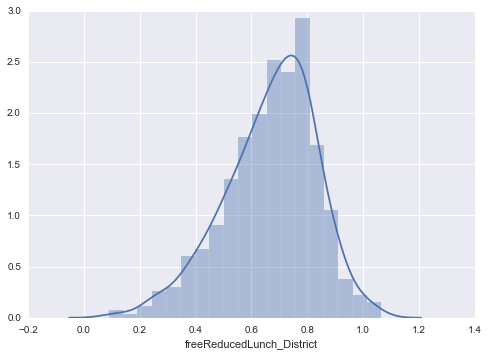

In [26]:
import seaborn as sns
sns.distplot(districtData2014['freeReducedLunch_District'])

districtData2014[['freeReducedLunch_District']].quantile([0,.33,0.5,.66,1])

sns.distplot(districtData2014['yearsExperienceTeachers_District'])

districtData2014[['yearsExperienceTeachers_District']].quantile([0,.33,0.5,.66,1])

### StudentTeacherRatio

- This feature is created from the total students enrolled and total teachers. It has fairly normal distribution, as shown below, with few outliers in the right

- low_StudentTeacherRatio is a categorical variable created to group those schools with low StudentTeacherRatio from the once above average and see whether schools with low StudentTeacherRatio can be classified using district socioeconomic data


,StudentTeacherRatio
0.00,6.510682
0.33,15.141321
0.50,16.298312
0.66,17.110924
1.00,50.529412


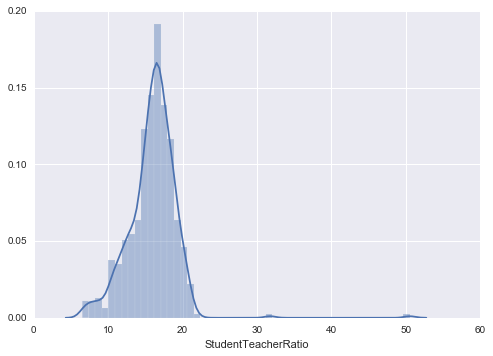

In [36]:
districtData2014['low_StudentTeacherRatio'] =(districtData2014['StudentTeacherRatio']
                                     <districtData2014['StudentTeacherRatio'].mean()).astype(int)
sns.distplot(districtData2014['StudentTeacherRatio'])

districtData2014[['StudentTeacherRatio']].quantile([0,.33,0.5,.66,1])



<p><a href="#top">Return to top</a></p>
<a id="dataPreparation"></a>
## Data Preparation
<a id="defineAndPrepare"></a>
### "Define and prepare ..."
<strong>[10 points]</strong> <em> This project looks at school data at a ditrict level.Two set of data are created using the features available at a district level.

1.<strong> The Socio Economic(SEC) Data</strong> - The features that explain the ethinic diversity as well as the economic status such as poverity rate, household income are used to prepare this data. Also created a dicrete student to teacher ratio low or high feature from the total students enrolled and the total number of teachers. The intention of anlysing this data will be if the schools with low or high student to teacher ratio can be classified using only the SEC data at a district level and not using the school attributes.

2.<strong>The District school data</strong> - The features for schools at district level as well as the SEC features of the district population is to be used to see if  education attainment of schools in the district can be effectively predicted.</em>



In [204]:
socioEconomic = ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District',
                 'averagePropertyValuePerADM_District','population_District','averageHouseholdIncome_District',
                 'unemploymentRate_District','povertyRate_District','singleParentFamilies_District', 
                 'freeReducedLunch_District', 'low_StudentTeacherRatio']
district_SEC = districtData2014[socioEconomic]

schoolAttributes = ['whiteOther_District','black_District','asian_District','hispanic_District','nativeAmerican_District',
                    'educationalAttainment_collegeAndAbove_District','educationalAttainment_highSchoolNoCollegeDegree_District',
                    'educationalAttainment_lessThan12thGrade_District','fallEnrollment_District','nonSpecialEdTeachersFTE_District',
                    'averageSalaryTeachers_District','advancedDegreeTeachers_District','studentsInSpecialEd_District',
                    'studentsInELL_District','specialEdTeachersFTE_District','counselorsFTE_District',
                    'otherProfessionalStaffFTE_District','administratorsFTE_District','yearsExperienceTeachers_District',
                    'freeReducedLunch_District','averagePropertyValuePerADM_District','population_District',
                    'averageHouseholdIncome_District','unemploymentRate_District','povertyRate_District',
                    'singleParentFamilies_District']
District_school = districtData2014[schoolAttributes]

schoolData2014.shape


(1767, 16)

<p><a href="#top">Return to top</a></p>
<a id="describeTheFinal"></a>
### "Describe the final ..."
* <a href="#describeTheFinal">[5 points]</a> <em>I divided the distrct data into Socioeconomic and School data.</em>

1. Socioeconomic(SEC) - Describes basically the social staus of the district inhabitants. It is highly likely that the percentage of students with student teacher ratio benefit in the schools are highly correlated to the district prosperity. Therefore in this project we would like to regress the percentage of reduced lunch from the SEC data

2. School data at the district level is has all teacher and school related data such as the teacher education level, number of students enrolled and the eductional achievement at the district level and the polpulation ethinic composition at district level. The question of interest is can we classify the level of experience of teacheres the schools in district have from the district school data

<p><a href="#top">Return to top</a></p>
<a id="modelingAndEvaluation"></a>
## Modeling and Evaluation
* <a href="#chooseAndExplain">[10 points]</a> <em>Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.</em>
* <a href="#chooseTheMethod">[10 points]</a> <em>Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.</em>
* <a href="#createThreeDifferent">[20 points]</a> <em>Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!</em>
* <a href="#analyzeTheResults">[10 points]</a> <em>Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.</em>
* <a href="#discussTheAdvantages">[10 points]</a> <em>Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation.</em>
* <a href="#whichAttributesFrom">[10 points]</a> <em>Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.</em>

### Classification of low teacher student ratio at a district level from socioeconomic(SEC) data
Training and testing set split
"... (use 80/20 training/testing split for your data."

In [44]:
y = district_SEC['low_StudentTeacherRatio'].values
del district_SEC['low_StudentTeacherRatio'] 
X = district_SEC.values

<p><a href="#top">Return to top</a></p>
<a id="chooseTheMethod"></a>
### "Choose the Method ..."
<strong>[10 points]</strong> <em>Stratification is the process of ensuring each fold is representative of all strata of the data making it a good representative of the whole. As I have binary classification problem where each class comprises close to 50% of the data, it is best to arrange the data such that in every fold, each class comprises around half the instances.stratification is generally a better scheme, both in terms of bias and variance, when compared to regular cross-validation. 

It has been generally agreed that optimum balance of bias variance of data is achieve when data is split into 10 folds.Each fold is then used a validation set once while the 9 remaining fold form the training set The 10 results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.</em>

In [123]:
from sklearn.cross_validation import StratifiedKFold , cross_val_score

num_cv_iterations = 10
num_instances = len(y)
cv_object = StratifiedKFold(y,n_folds=10)

<p><a href="#top">Return to top</a></p>
<a id="chooseAndExplain"></a>
### "Evaluation Metric..."
<strong>[10 points]</strong> <em> Identifying  category of school with low student teacher ratio is classification procedure that we want to be accurate as logistic and budget appropriation requires allocating more resources to the schools with high student-teacher ratio and reducing from the ones with very low  student-teacher ratio . misclassifying the schools into the wrong category will hamper the effectivnes of the model in doing the . Identifying school with low student teacher ratio might be something where we want low false positives (i.e., when we think there is a School with low studentteacher ratio, there should truly be one). Whereas it is equally important to have true negatives (i.e., measures the proportion of negatives, high studentteacher ratio, that are correctly identified as such) as it is important for the district to identify those schools for the purpose of allocating more teachers and budget</em>

<p><a href="#top">Return to top</a></p>
<a id="createThreeDifferent"></a>
### "Create Three Different ..."
<strong>[20 points]</strong> <em>Three different classification models are created below to calssify schools with low student teacher ratio. For each modeling techniques parameters as appropriate  are adjusted to maximize generalization performance </em>

## Logit Model 
- with grids_search of the apprpriate parameters to increase generalization
- on standardized data as some features have very high numbers such as house hold income

In [158]:
from sklearn import grid_search
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

lr = LogisticRegression()
# using grid search to come up with optimum combination of parameters.
c_range = np.logspace(-10,10)
penalty=('l1','l2')
lr_clf= grid_search.GridSearchCV(estimator=lr, param_grid=dict(C=c_range, penalty = penalty), n_jobs=1)

std_scl = StandardScaler()


iter_num=0

logAccScores = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object):
#   scaling the data as features like household income have very high numbers
    X_train = X[train_indices]
    y_train = y[train_indices]    
    X_test = X[test_indices]
    y_test = y[test_indices]

    scl_obj = StandardScaler()
    scl_obj.fit(X_train) 
    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test)
    
    lr_clf.fit(X_train_scaled,y_train)  # train object
    y_hat = lr_clf.predict(X_test_scaled) # get test set precitions
#     lr_clf.fit(X[train_indices],y[train_indices])
#     y_hat = lr_clf.predict(X[test_indices])
    conf = mt.confusion_matrix(y[test_indices],y_hat)
    acc = mt.accuracy_score(y[test_indices],y_hat)
    
    print ("====Iteration",iter_num+1," ====")
    print ('Accuracy:', acc) # Overall, how often is the classifier correct?
    logAccScores.append(acc)
    print ('Misclassification:', 1-acc)  #Overall, how often is it wrong?
    print ("Specificity:",conf[0,0]/float(conf[0,1]+conf[0,0])) # When it's actually no, how often does it predict no?
    print ("Precision:",conf[1,1]/float(conf[0,1]+conf[1,1])) # When it predicts yes, how often is it correct?
    print ("Confusion matrix:\n",(conf))   
    print ("\n")
    print("The best classifier is: ", lr_clf.best_estimator_)
    print ("\n")
    print ("Average accuracy score:", sum(logAccScores)/len(logAccScores))

====Iteration 1  ====
Accuracy: 0.754716981132
Misclassification: 0.245283018868
Specificity: 0.633333333333
Precision: 0.65625
Confusion matrix:
 [[19 11]
 [ 2 21]]


The best classifier is:  LogisticRegression(C=10.481131341546874, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


Average accuracy score: 0.754716981132
====Iteration 2  ====
Accuracy: 0.807692307692
Misclassification: 0.192307692308
Specificity: 0.827586206897
Precision: 0.782608695652
Confusion matrix:
 [[24  5]
 [ 5 18]]


The best classifier is:  LogisticRegression(C=1.5998587196060574, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


Aver

### Average accuracy over 10 folds 
- using the best parameter chosen by the grid search CV

In [159]:
from sklearn.pipeline import make_pipeline
    
best_clf =LogisticRegression(C=1.5998587196060574, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
start = time()
clf = make_pipeline(StandardScaler(), best_clf)
acc = cross_val_score(clf,X,y=y,cv=cv_object)
print("time it took - %.2f seconds ."  % (time() - start))
print ("Average accuracy = ", acc.mean()*100, "+/-", acc.std()/2*100)

time it took - 0.05 seconds .
Average accuracy =  75.2207661003 +/- 2.41843289212


In [76]:
best_clf.fit(X_train_scaled,y_train)

zip_vars = zip(best_clf.coef_.T,district_SEC.columns) # combine attributes
# zip_vars.sort(zip_vars.columns[1], ascending = 1) # sort them by the magnitude of the weight
for coef, name in zip_vars:
    print (name, 'has weight of', coef[0]) # now print 

whiteOther_District has weight of -0.203459038697
black_District has weight of -0.71130657074
asian_District has weight of 0.0984518263625
hispanic_District has weight of 0.181504695163
nativeAmerican_District has weight of 0.0
averagePropertyValuePerADM_District has weight of 1.08112944173
population_District has weight of -7.83400622313
averageHouseholdIncome_District has weight of -0.354113706011
unemploymentRate_District has weight of -0.0522720706155
povertyRate_District has weight of 0.25984209674
singleParentFamilies_District has weight of -0.0026368738055
freeReducedLunch_District has weight of 0.228603495678


### RandomForest Model 
- with GridSearchCV, RandomizedSearchCV on appropriate parameters. As shown below RandomizedSearchCV takes very low time and results are comaprable to GridSearchCV
- the model rank and results with parameters are displayed for comparison with logistic regression model.

In [162]:
print(__doc__)

import numpy as np

from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint

from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier


# build a classifier
RandomF_clf = RandomForestClassifier(n_estimators=20)

# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} +/- std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(RandomF_clf, param_distributions=param_dist,n_iter=n_iter_search, cv = cv_object)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.grid_scores_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(RandomF_clf, param_grid=param_grid, cv = cv_object)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.grid_scores_)))
report(grid_search.grid_scores_)

Automatically created module for IPython interactive environment
RandomizedSearchCV took 8.74 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.756 +/- std: 0.071)
Parameters: {'min_samples_leaf': 5, 'min_samples_split': 7, 'max_depth': 3, 'bootstrap': False, 'criterion': 'entropy', 'max_features': 8}

Model with rank: 2
Mean validation score: 0.750 +/- std: 0.052)
Parameters: {'min_samples_leaf': 9, 'min_samples_split': 10, 'max_depth': 3, 'bootstrap': True, 'criterion': 'entropy', 'max_features': 7}

Model with rank: 3
Mean validation score: 0.750 +/- std: 0.068)
Parameters: {'min_samples_leaf': 1, 'min_samples_split': 3, 'max_depth': None, 'bootstrap': True, 'criterion': 'entropy', 'max_features': 6}

GridSearchCV took 93.68 seconds for 216 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.768 +/- std: 0.037)
Parameters: {'min_samples_leaf': 3, 'min_samples_split': 1, 'max_depth': 3, 'bootstrap': True, 'criterion': 'gin

### Average accuracy over 10 folds 
- using the best parameter chosen by the grid search CV

In [165]:
start = time()
RandomF_clf =RandomForestClassifier(max_depth= None, bootstrap= True, min_samples_leaf= 3, min_samples_split= 9,
                            criterion = 'entropy', max_features= 3)
acc = cross_val_score(RandomF_clf,X,y=y,cv=cv_object)
print("time it took - %.2f seconds ."  % (time() - start))
print ("Average accuracy = ", acc.mean()*100, "+/-", acc.std()/2*100)

time it took - 0.27 seconds .
Average accuracy =  72.7164261931 +/- 2.03486498114


### DecisionTreeClassifier Machine model
<em>"Creating a DecisionTreeClassifier model on SCE data using Gridsearch..."</em>

In [146]:
from sklearn.tree import DecisionTreeClassifier

# build a classifier
Decision_clf = DecisionTreeClassifier()

# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} +/- std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")


# specify parameters and distributions to sample from
param_dist = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(Decision_clf, param_distributions=param_dist,n_iter=n_iter_search, cv = cv_object)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.grid_scores_)

# use a full grid over all parameters
# run grid search
grid_search = GridSearchCV(Decision_clf, param_grid=param_dist, cv = cv_object)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.grid_scores_)))
report(grid_search.grid_scores_)

RandomizedSearchCV took 0.34 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.729 +/- std: 0.042)
Parameters: {'criterion': 'gini', 'max_features': 4, 'max_depth': 4, 'splitter': 'best'}

Model with rank: 2
Mean validation score: 0.706 +/- std: 0.045)
Parameters: {'criterion': 'entropy', 'max_features': 2, 'max_depth': 4, 'splitter': 'best'}

Model with rank: 3
Mean validation score: 0.704 +/- std: 0.057)
Parameters: {'criterion': 'gini', 'max_features': 3, 'max_depth': 3, 'splitter': 'best'}

GridSearchCV took 1.05 seconds for 80 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.727 +/- std: 0.065)
Parameters: {'criterion': 'entropy', 'max_features': 3, 'max_depth': 3, 'splitter': 'best'}

Model with rank: 2
Mean validation score: 0.716 +/- std: 0.077)
Parameters: {'criterion': 'gini', 'max_features': 4, 'max_depth': 1, 'splitter': 'best'}

Model with rank: 3
Mean validation score: 0.714 +/- std: 0.050)
Parameters: {'cri

<p><a href="#top">Return to top</a></p>
<a id="analyzeTheResults"></a>
### "Analyze the results ..."
<strong>[10 points]</strong> <em>Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.</em>

### DecisionTreeClassier
Average accuracy over 10 folds 
- using the best parameter chosen by the grid search CV

In [59]:
start = time()
Decision_clf =DecisionTreeClassifier(criterion = 'gini', max_features= 3, max_depth=4, splitter = 'best')
acc = cross_val_score(Decision_clf,X,y=y,cv=cv_object)
print("time it took - %.2f seconds ."  % (time() - start))
print ("Average accuracy = ", acc.mean()*100, "+/-", acc.std()/2*100)

time it took - 0.02 seconds .
Average accuracy =  71.3409601867 +/- 2.80002386855


### RandomForest
  
- Average accuracy over 10 folds 
- using the best parameter chosen by the grid search CV
- important features

In [168]:
start = time()
RandomF_clf =RandomForestClassifier(max_depth= None, bootstrap= True, min_samples_leaf= 3, min_samples_split= 9,
                            criterion = 'entropy', max_features= 3)
acc = cross_val_score(RandomF_clf,X,y=y,cv=cv_object)
print("time it took - %.2f seconds ."  % (time() - start))
print ("Average accuracy = ", acc.mean()*100, "+/-", acc.std()/2*100)




time it took - 0.27 seconds .
Average accuracy =  73.2823216369 +/- 2.28758163939


### Important attribute
Population_district is the most important attribute of the socioeconomic data. This feature explains population count.
Unlike in the case of Logistic Rgression( shown in the following cells) other features such as property value and black population seem to have significance as well.

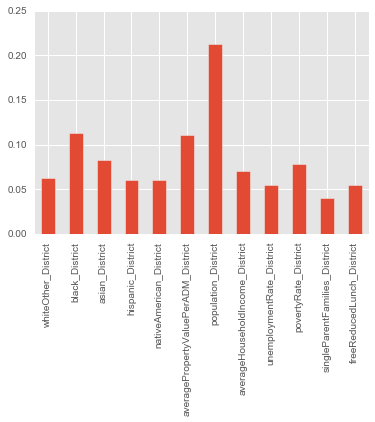

In [172]:
# get the importances
for train, test in cv_object:
    # train the decision tree algorithm
    RandomF_clf.fit(X[train],y[train])
    yhat = RandomF_clf.predict(X[test])
                          
imp =RandomF_clf.feature_importances_

imp_features = pd.Series(imp,index=district_SEC.columns)
imp_features.plot(kind='bar')
plt.show()

# The best of three model
### LogisticRegression
- Average accuracy over 10 folds
- using the best parameter chosen by the grid search CV
- important features


In [160]:
from sklearn.pipeline import make_pipeline
    
best_clf =LogisticRegression(C=1.5998587196060574, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
start = time()
clf = make_pipeline(StandardScaler(), best_clf)
acc_logit = cross_val_score(clf,X,y=y,cv=cv_object)
print("time it took - %.2f seconds ."  % (time() - start))
print ("Average accuracy = ", acc.mean()*100, "+/-", acc.std()/2*100)

time it took - 0.05 seconds .
Average accuracy =  75.2207661003 +/- 2.41843289212


### Important attribute
Population_district is by far the most important attribute of the socioeconomic data. This feature explains population count of those living within district boundaries and can be used to classify the schools category on studentteacher raio i.e as shown by relatively high accuracy of 75.2 % districts with low number of residents have low teacher to student ratio.

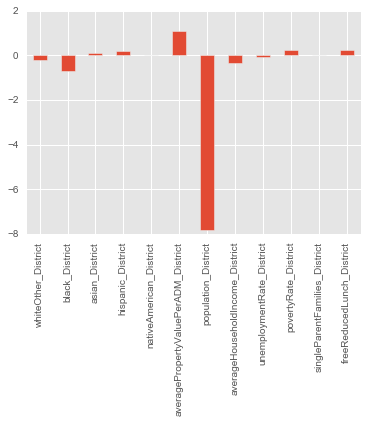

In [78]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(best_clf.coef_[0],index=district_SEC.columns)
weights.plot(kind='bar')
plt.show()

<p><a href="#top">Return to top</a></p>
<a id="discussTheAdvantages"></a>
### "Discuss the Advantages..."
<strong>[10 points]</strong> <em>Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation.</em>

#### Advantage of Logistic regression model
- Unlike decisionTree models that has decision boundaries that are parallel to the axes , the probabilistic framework of logistic regression has one smooth linear decision boundary. It finds that linear decision boundary by making assumptions that the P(Y|X) of some form, like the inverse logit function applied to a weighted sum. 
- It took only 0.02 second which makes it very efficient
- It is not prone to overfitting as it has options of regularization
- Its disadvantage is it requires a standardized data

#### Advantage and Disadvatage of RandomForestClassifier model
Disadvantage
- May overfit data but has better accuracy than DecisionTreeClassifier due to the random selection of features which helps avoid overfit. As shown from the result the accuracy has high standard deviation
- Unlike decisionTree models that has decision boundaries that are parallel to the axes 
- It took slightly higher time 

Advantage
- does not expect linear features or even features that interact linearly. 
- handle very well high dimensional spaces as well as large number of training
- does not need data standardization and handles missing data well

#### Advantage and Disadvatage of DecisionTreeClassifier mode

- Known to overfit data 
- has decision boundaries that are parallel to the axes
- May get stuck in local minima so need ensembles to help reduce the variance
- Reltively fast computation


### Statistically Testing if Logistic classifier accuracy is significantly different from RandomForest Classifier
<strong>Null hypothesis</strong>The difference between mean accuracy from the two classifiers equals zero 
  i.e μ acc_logit - μ acc_RandomF_clf  = 0 

In [120]:
from sklearn.cross_validation import cross_val_score

# is best_clf ( Logit classifier) better or worse than RandomF_clf?
cv=StratifiedKFold(y,n_folds=10)
acc1 = cross_val_score(best_clf, X, y=y, cv=cv)
acc2 = cross_val_score(RandomF_clf, X, y=y, cv=cv)

#=================================

t = 2.26 / np.sqrt(10)

e = (1-acc1)-(1-acc2)
# std1 = np.std(acc1)
# std2 = np.std(acc2)
stdtot = np.std(e)

dbar = np.mean(e)
print ('Range of:', dbar-t*stdtot,dbar+t*stdtot )
print (np.mean(acc1), np.mean(acc2))



Range of: -0.0650433521284 0.0150291229244
0.754280144569 0.729273029967


### Fail to Reject Null Hypothesis
The confidence interval at 95% interval is (-0.0650433521284, 0.0150291229244) which includes zero.
<strong>Conclusion</strong>difference in mean accuracy from the two classifiers equals are not statistically significant. Both models are equally in this case
  


### Predict the percentage of reduced free lunch 
Using data at a ditric level

In [205]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor,LassoCV, ElasticNetCV,RidgeCV
import numpy as np
import pylab as pl

y = District_school['freeReducedLunch_District'].values
del District_school['freeReducedLunch_District'] 
X = District_school.values


### Regularization
Regularization is a method for "constraining" the size of the coefficients, thus "shrinking" them towards zero. It tends to reduce variance more than it increases bias, and thus minimizes overfitting.
#### Regularization Techniques for linear models:
- Ridge regression (also known as "L2 regularization"): shrinks coefficients toward zero (but they never reach zero)
- Lasso regularization (also known as "L1 regularization"): shrinks coefficients all the way to zero. This model is good for feature selection if features are irrelevant, since a feature with a zero coefficient is essentially removed from the model
- ElasticNet regularization:
- Stochastic Gradient Descent (SGD)

A tuning parameter alpha (or sometimes lambda) imposes a penalty on the size of coefficients.
Instead of minimizing the "loss function" (mean squared error), it minimizes the "loss plus penalty".
- A tiny alpha imposes no penalty on the coefficient size, and is equivalent to a normal linear model.
- Increasing the alpha penalizes the coefficients and shrinks them toward zero.
#### Bias-variance trade-off
Our goal is to locate the optimum model complexity.



#### Lasso model alpha selection with LassoCV
- selection of alpha using LassoCV object-  sets its alpha parameter automatically from the data by internal cross-validation. We use external cross-validation to see how much the automatically obtained alphas differ across different cross-validation folds.

In [209]:
alphas = np.logspace(-4, -.5,  6.9346206263)
lasso = LassoCV(alphas=alphas)
lasso.fit(X, y)
LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)
# The estimator chose automatically its lambda:
lasso.alpha_ 

0.0001

#### Elastic model alpha selection with ElasticNetCV
- balance between Ridge and Lasso - Linear regression with combined L1 and L2 priors as regularizer.
- selection of alpha using ElasticNetCV object- sets its alpha parameter automatically from the data by internal cross-validation. We use external cross-validation to see how much the automatically obtained alphas differ across different cross-validation folds.

In [207]:
elastic = ElasticNetCV()
elastic.fit(X, y)
ElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False,
             precompute='auto', max_iter=1000, tol=0.0001, cv=None, copy_X=True, verbose=0, n_jobs=1, 
             positive=False, random_state=None, selection='cyclic')
# The estimator chose automatically its lambda:
elastic.alpha_ 

3.8730526961164768

#### Ridge model alpha selection with RidgeCV
- selection of alpha using RidgeCV object-  sets its alpha parameter automatically from the data by internal cross-validation. We use external cross-validation to see how much the automatically obtained alphas differ across different cross-validation folds.
- shrinks coefficients toward zero (but they never reach zero)

In [221]:
from sklearn.linear_model import RidgeCV 
ridge = RidgeCV()
ridge.fit(X, y)
RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None,
        store_cv_values=False)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

### Model selection criteria 
- The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model . Mathematically it is represented as R-squared = Explained variation / Total variation 
- The root-mean-square deviation (RMSD) is measure of the differences between values predicted by a model and the values actually observed. The RMSD represents the sample standard deviation of the differences between predicted values and observed values. These individual differences are called residuals when the calculations are performed over the data sample that was used for estimation, and are called prediction errors when computed out-of-sample

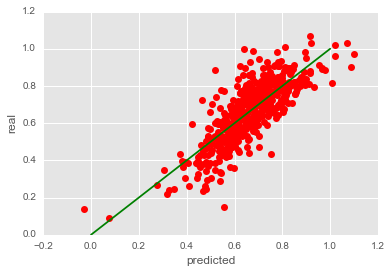

Method: linear regression
r^2 on test data : 0.519776
RMSE on training: 0.0993
RMSE on 10-fold CV: 0.1080




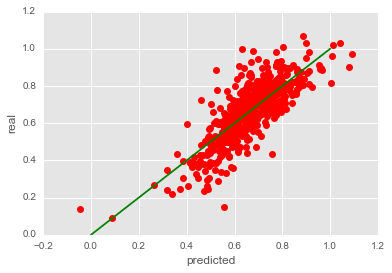

Method: lasso
r^2 on test data : 0.520752
RMSE on training: 0.0997
RMSE on 10-fold CV: 0.1080




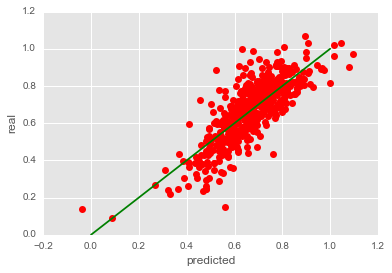

Method: ridge
r^2 on test data : 0.521752
RMSE on training: 0.0995
RMSE on 10-fold CV: 0.1080




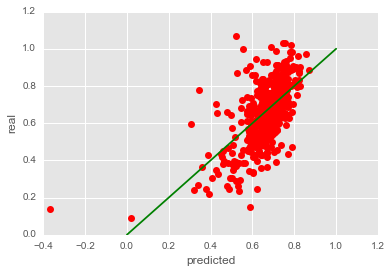

Method: elastic-net
r^2 on test data : 0.308509
RMSE on training: 0.1269
RMSE on 10-fold CV: 0.1311




In [227]:
from sklearn.metrics import r2_score 
import pylab as pl

alphaRidge = 0.1 
alphaLasso = 0.0001 
alphaElastic = 3.8730526961164768 
for name,met in [ ('linear regression', LinearRegression()),
                 ('lasso', Lasso(fit_intercept=True, alpha=alphaLasso)),
                 ('ridge', Ridge(fit_intercept=True, alpha=alphaRidge)), 
                 ('elastic-net', ElasticNet(fit_intercept=True, alpha=alphaElastic)) ]: 
    met.fit(X,y)
    # p = np.array([met.predict(xi) for xi in x])
    p = met.predict(X)
    e = p-y
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))
    # Plot outputs
    %matplotlib inline
    pl.plot(p, y,'ro')
    pl.plot([0,1],[0,1], 'g-')
    pl.xlabel('predicted')
    pl.ylabel('real')
    pl.show()

    kf = KFold(len(X), n_folds=10)
    err = 0
    R2 = 0
    for train,test in kf:
        met.fit(X[train],y[train])
        p = met.predict(X[test])
        e = p-y[test]
        err += np.dot(e,e)
    #     print (met.score(X[test], y[test]))
        R2 += r2_score(y[test], p)



    rmse_10cv = np.sqrt(err/len(X))
    r2 = float(R2)
    print('Method: %s' %name)
    print("r^2 on test data : %f" % (r2/10))
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
    print ("\n")

### Stochastic Gradient Descent:
 - the gradient of the loss is estimated each sample at a time and the model is updated along the way with a learning rate

In [216]:
clf = SGDRegressor()
clf.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [217]:

scaler = StandardScaler()
scaler.fit(X)
x_s = scaler.transform(X)

sgdreg = SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

# Compute RMSE on training data
r_sqr = 0
sgdreg.fit(x_s,y)
p = sgdreg.predict(x_s)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(X), n_folds=10)
xval_err = 0
for train,test in kf:
    scaler = StandardScaler()
    scaler.fit(X[train])  # Don't cheat - fit only on training data
    xtrain_s = scaler.transform(X[train])
    xtest_s = scaler.transform(X[test])  # apply same transformation to test data
    sgdreg.fit(xtrain_s,y[train])
    p = sgdreg.predict(xtest_s)
    e = p-y[test]
    xval_err += np.dot(e,e)
    new = sgdreg.score(xtest_s, y[test])
    r_sqr += new 

r2 = float(r_sqr)
rmse_10cv = np.sqrt(xval_err/len(X))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print ('Average R2 on 10-fold CV: %.4f' %(r2/10))
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Stochastic Gradient Descent Regression
Average R2 on 10-fold CV: 0.5230
RMSE on training: 0.1009
RMSE on 10-fold CV: 0.1063


This model explains 52% of the variation and has almost the same result as the linear regression model

### Model Selection
- Both Linear regression, lasso and ridge model give R2 value of 0.52. The difference of RMSE between train and test data is very low as well 


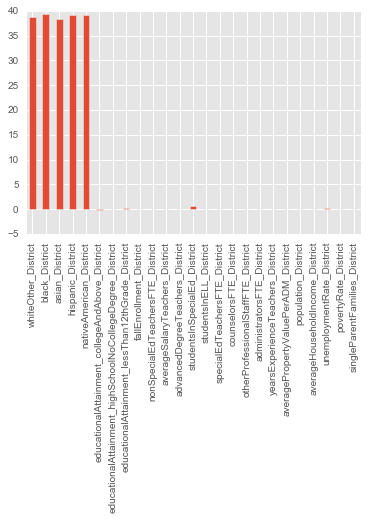

Linear model: 39.369 * black_District + 39.175 * hispanic_District + 39.088 * nativeAmerican_District + 38.78 * whiteOther_District + 38.235 * asian_District + 0.628 * studentsInSpecialEd_District + -0.272 * educationalAttainment_collegeAndAbove_District + 0.251 * unemploymentRate_District + 0.173 * educationalAttainment_lessThan12thGrade_District + 0.099 * educationalAttainment_highSchoolNoCollegeDegree_District + 0.089 * povertyRate_District + 0.061 * advancedDegreeTeachers_District + 0.045 * singleParentFamilies_District + -0.044 * studentsInELL_District + -0.004 * yearsExperienceTeachers_District + -0.002 * counselorsFTE_District + 0.002 * otherProfessionalStaffFTE_District + -0.001 * administratorsFTE_District + -0.001 * specialEdTeachersFTE_District + -0.0 * nonSpecialEdTeachersFTE_District + -0.0 * fallEnrollment_District + 0.0 * population_District + -0.0 * averageHouseholdIncome_District + 0.0 * averageSalaryTeachers_District + 0.0 * averagePropertyValuePerADM_District


In [211]:
lr = LinearRegression()
names = District_school.columns
lr.fit(X, y)

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr.coef_,index=District_school.columns)
weights.plot(kind='bar')
plt.show()
 
#A helper method for pretty-printing linear models
def pretty_print_linear(coefs, names = None, sort = False):
#     if names == None:
#         names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)
 
print ("Linear model:", pretty_print_linear(lr.coef_, names, sort = True))  

### Important Features
- all the demographic features are found to be the only one that are found to be importan
- This model only explains 52 % of the variation in Reduced/Free Lunch student percentage

<p><a href="#top">Return to top</a></p>
<a id="deployment"></a>
## Deployment
* <em>How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?</em>

Both the classification and regression models are useful in allocating resources and budgets to schools using the data available
at the district leve.
- One important thing that sticks out from the classification model is that the teachers seem to be equally allocated to schools 
irrespective of the district population size resulting with 72 % accuracy that ditricts with high resident counts have high student 
to teacher ratio. Therefor this calls for managment to allocate teachers in proportion to the district population size
- The reduced/free lunch students size are not related to poverty or other economic status. The ehinic backgrounds feaures
( White, black or other) are equally weighted therfore it is not specifically related to any race as well. And yet there is a 
wide variation (as shown below more) which are only explained 52 % by the model. More features about the the reduced/free lunch 
students needs to be collected.

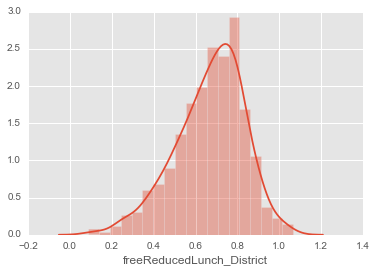

In [219]:
sns.distplot(districtData2014['freeReducedLunch_District'])